In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from wingstructure import multhopp

# Validation Multhopp Method

## Circulation Distribution

Reference data taken from *H.Schlichting, E.Truckenbrodt-Aerodynamik des Flugzeugs*

4.52728040191
4.53042483119
4.53042497956


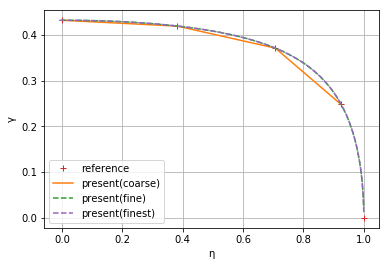

In [12]:
Λ = 6 # aspect ratio of wing
    
b = 15 # m span width
c = b/Λ # depth of wing
y_li = [0,b/2] # section positions

α = 1 # angle of attack

# reference results
ηs_ref = [0,0.3827,0.7071,0.9239,1]
γs_ref = [0.4320,0.4192,0.3710,0.2485,0]

plt.plot(ηs_ref, γs_ref, 'C3+', label='reference')

# coarse calculation
M = 7

αs = [α]*M
θs = np.linspace(np.pi/(M+1), M/(M+1)*np.pi, M)
ηs = np.cos(θs)
chords = [c]*M
dcls = [2*np.pi]*M

γs = multhopp(αs, θs, chords, b, dcls)

plt.plot(ηs[:M//2+1], γs[:M//2+1], 'C1', label='present(coarse)')

print(calculate_liftcoefficients(θs, γs, chords, Λ, b, M)[0])

# finer calculation
M = 91

αs = [α]*M
θs = np.linspace(np.pi/(M+1), M/(M+1)*np.pi, M)
ηs =  np.cos(θs)
chords = [c]*M
dcls = [2*np.pi]*M

γs = multhopp(αs, θs, chords, b, dcls)

plt.plot(ηs[:M//2+1], γs[:M//2+1], 'C2--', label='present(fine)')

print(calculate_liftcoefficients(θs, γs, chords, Λ, b, M)[0])

# finest calculation
M = 190

αs = [α]*M
θs = np.linspace(np.pi/(M+1), np.pi*M/(M+1), M)
ηs =  np.cos(θs)
chords = [c]*M
dcls = [2*np.pi]*M

γs = multhopp(αs, θs, chords, b, dcls)

plt.plot(ηs[:M//2+1], γs[:M//2+1], 'C4--', label='present(finest)')

print(calculate_liftcoefficients(θs, γs, chords, Λ, b, M)[0])

# layout
plt.xlabel('η')
plt.ylabel('γ')
plt.grid()
plt.legend(loc='best')

## Induced Drag

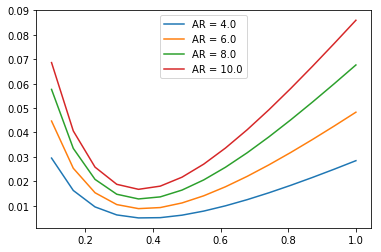

In [4]:
ARs = np.arange(4,10.5,2) # aspect ratios

tapers = np.linspace(1e-1,1.0,15) 

S = 10 #m^2

for AR in ARs:
    
    deltas = []
    ks = []
    for taper in tapers:
        
        b = np.sqrt(AR*S)
        
        c_r = S/b * 2/(1+taper)
        c_t = c_r * taper

        result = multhopp(alpha,[c_r,c_t],[0,b/2])
        
        k = result['k']
        ks.append(k)
        deltas.append(1/k-1)
        
    figure(1)    
    plot(tapers,deltas,label='AR = {}'.format(AR))

figure(1)
legend(loc='best')

Similar to Figure 5.20 from side 420 in Fundamentals of Aerodynamics 4. Edition 